#### **Ultralytics Yolo v3 설치**


In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9862, done.
remote: Total 9862 (delta 0), reused 0 (delta 0), pack-reused 9862
Receiving objects: 100% (9862/9862), 9.19 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (6666/6666), done.
     |████████████████████████████████| 596 kB 5.3 MB/s 


In [4]:
from IPython.display import Image,clear_output
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CUP'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


In [5]:
!nvidia-smi

Thu Oct 21 09:55:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    29W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!cd yolov3/data/images; ls -lia

total 656
3014686 drwxr-xr-x 2 root root   4096 Oct 21 09:50 .
3014676 drwxr-xr-x 4 root root   4096 Oct 21 09:50 ..
3014687 -rw-r--r-- 1 root root 487438 Oct 21 09:50 bus.jpg
3014688 -rw-r--r-- 1 root root 168949 Oct 21 09:50 zidane.jpg


#### **이미지 Detection**

In [7]:
#detect.py를 직접 호출하여 수행가능
!cd yolov3; python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

100% 118M/118M [00:01<00:00, 93.7MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.158s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.119s)
Results saved to runs/detect/exp
Done. (0.504s)


In [8]:
#--project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨
!ls -lia ./yolov3/runs/detect/exp

total 748
3539017 drwxr-xr-x 2 root root   4096 Oct 21 10:02 .
3539016 drwxr-xr-x 3 root root   4096 Oct 21 10:02 ..
3539028 -rw-r--r-- 1 root root 496317 Oct 21 10:02 bus.jpg
3539029 -rw-r--r-- 1 root root 255505 Oct 21 10:02 zidane.jpg


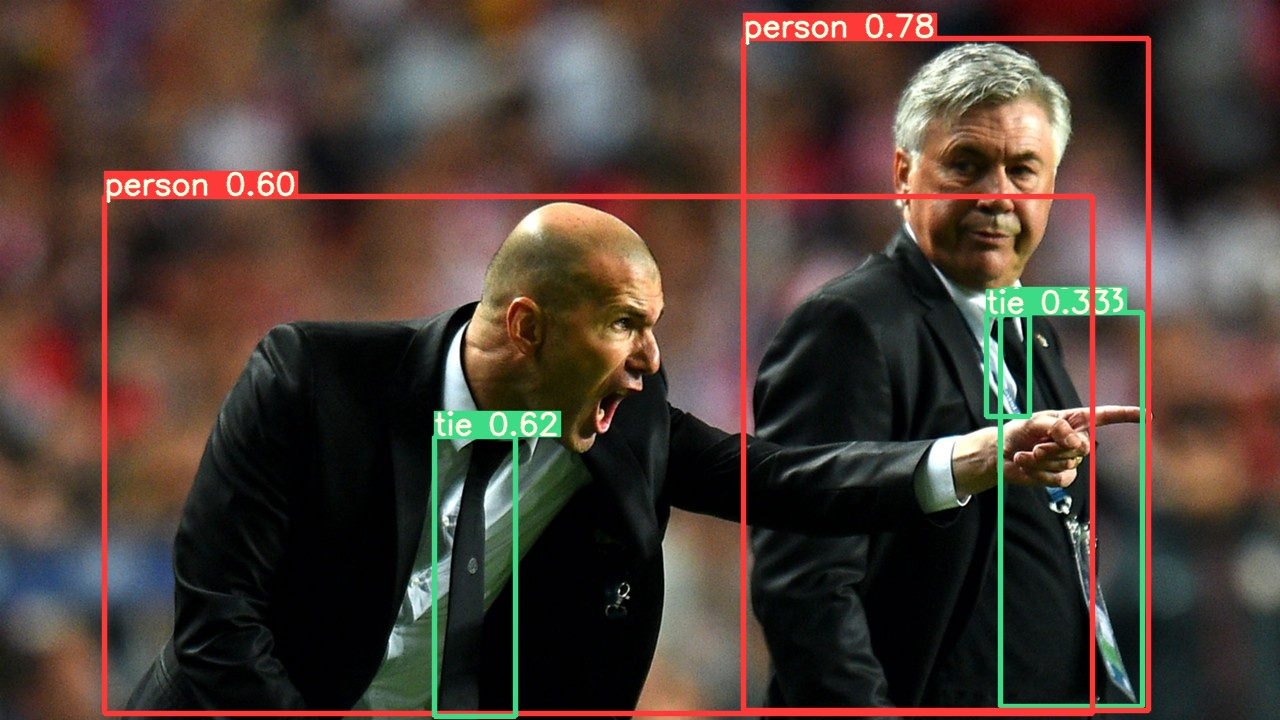

In [11]:
Image(filename='/content/yolov3/runs/detect/exp/zidane.jpg',width=600)

#### **다른 image로 Detect수행**

In [12]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-10-21 10:05:37--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2021-10-21 10:05:37 (10.5 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



In [15]:
!cd yolov3;python detect.py --weight yolov3.pt --img 640 --conf 0.25 --source /content/data/beatles01.jpg \
--project /content/data --name=run_image --exist-ok --line-thickness 1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=1, max_det=1000, name='run_image', nosave=False, project='/content/data', save_conf=False, save_crop=False, save_txt=False, source='/content/data/beatles01.jpg', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/beatles01.jpg: 512x640 5 persons, 10 cars, 1 tie, Done. (0.154s)
Results saved to /content/data/run_image
Done. (0.189s)


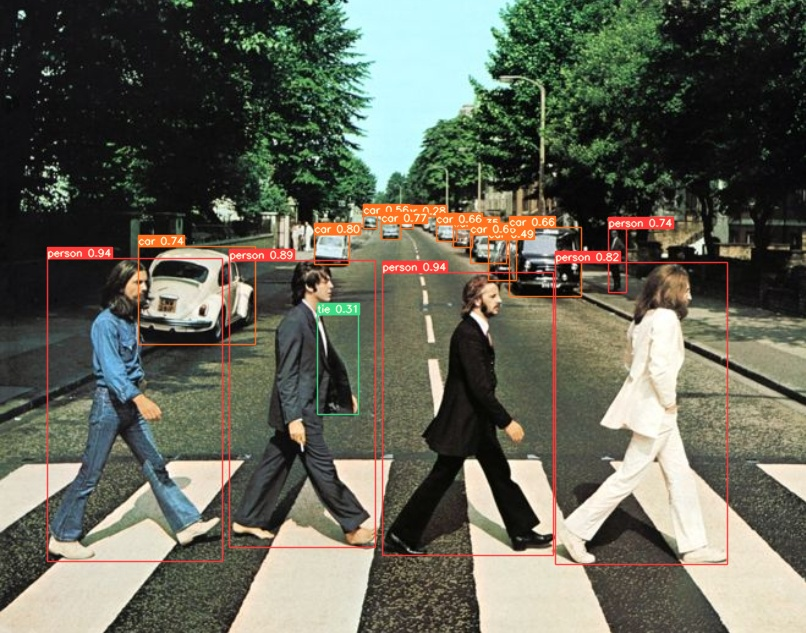

In [16]:
Image(filename='/content/data/run_image/beatles01.jpg',width=600)

#### **Video Detection**
* detect.py의 source가 mp4면 자동으로 Video Detection 수행

In [17]:
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2021-10-21 10:10:37--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2021-10-21 10:10:37--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2021-10-21 10:10:37--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [18]:
!cd yolov3; python detect.py --weight yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
--project=/content/data/run_video --exist-ok --line-thickness 1 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=1, max_det=1000, name='exp', nosave=False, project='/content/data/run_video', save_conf=False, save_crop=False, save_txt=False, source='/content/data/Night_Day_Chase.mp4', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
video 1/1 (1/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.108s)
video 1/1 (2/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.101s)
video 1/1 (3/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.097s)
video 1/1 (4/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.087s)
vid